# Here is the Notebook for looking at the LR attacker results

First gather the data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import results
import seaborn as sns
from IPython.display import display

rg = results.resultGatherer()
dfAll = rg.gatherResults()

First let's look at the first few rows of data. Columns starting with 'a_' are the anonymization paramaters. Those with 't_' are the table parameters. Those with 's_' are the solver results. TODO: explain more.

In [2]:

display(dfAll.head())

,seed,s_err,s_rght,s_wrng,s_tim,s_matc,s_impv,s_nona,s_bkts,s_choi,...,s_sup,s_sol,a_lcfH,a_lcfL,a_sd,e_lcf,e_nse,t_shape,t_tab,l_lcf
0,a,0.634921,0.556,0.185,0.06,0.741,0.300000,0.259,63,243,...,54,Optimal,4,4,0.0,0.25,1.0,"[3, 3, 3]",complete,"LCF(4,4)"
1,a,0.634921,0.556,0.185,0.05,0.741,0.300000,0.259,63,243,...,54,Optimal,4,4,0.0,0.50,1.0,"[3, 3, 3]",complete,"LCF(4,4)"
2,a,0.634921,0.556,0.185,0.07,0.741,0.125000,0.259,63,243,...,54,Optimal,4,4,0.0,0.75,1.0,"[3, 3, 3]",complete,"LCF(4,4)"
3,a,0.634921,0.556,0.185,0.04,0.741,0.363636,0.259,63,243,...,54,Optimal,4,4,0.0,1.00,1.0,"[3, 3, 3]",complete,"LCF(4,4)"
4,a,0.126984,0.704,0.148,0.13,0.852,0.555556,0.148,63,972,...,40,Optimal,6,2,0.0,0.25,1.0,"[3, 3, 3]",complete,"LCF(2,6)"


Some of these columns are just statistics about the solver itself, so let's make a dataframe with just the columns related to anonymization.

In [3]:
df = dfAll.query('seed == "a"')
df = df[['s_matc','s_impv','s_err','s_errt','s_nona','s_rght','s_wrng','a_lcfL','a_lcfH','a_sd','e_lcf','e_nse','t_shape','t_tab']]

In [4]:
df.describe(include='all')

,s_matc,s_impv,s_err,s_nona,s_rght,s_wrng,a_lcfL,a_lcfH,a_sd,e_lcf,e_nse,t_shape,t_tab
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.0,16,16
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[3, 3, 3]",random
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,8
mean,0.775688,0.458543,0.319444,0.182688,0.409625,0.407500,3.000000,5.000000,0.0,0.625000,1.0,NaN,NaN
std,0.074576,0.238829,0.194825,0.098792,0.154109,0.204053,1.032796,1.032796,0.0,0.288675,0.0,NaN,NaN
min,0.667000,0.000000,0.126984,0.074000,0.111000,0.148000,2.000000,4.000000,0.0,0.250000,1.0,NaN,NaN
25%,0.741000,0.300000,0.222222,0.074000,0.360750,0.185000,2.000000,4.000000,0.0,0.437500,1.0,NaN,NaN
50%,0.741000,0.459596,0.222222,0.185000,0.370000,0.426000,3.000000,5.000000,0.0,0.625000,1.0,NaN,NaN
75%,0.852000,0.697940,0.373016,0.259000,0.556000,0.565250,4.000000,6.000000,0.0,0.812500,1.0,NaN,NaN


Check that the solver found an optimal solution for each reconstruction.

In [5]:
print(f'''There are {len(dfAll.query('s_sol != "Optimal"').index)} non-optimal solutions''')

There are 0 non-optimal solutions


Indeed all solutions are optimal (meaning a solution that satisfied all of the constraints perfectly). This of course does not mean that the table was perfectly reconstructed, however.

## Effect of random seed (no elastic constraints)

Now let's look to see what the effect of using different random seeds is. We are interested in two things:
1. The effect of random tables, and
2. The effect of noisy LCF thresholds.

[Text(0.5, 0, 'Table Type'),
 Text(0, 0.5, 'Reconstruction Quality'),
 Text(0.5, 1.0, 'Effect of random seed (no elastic constraints')]

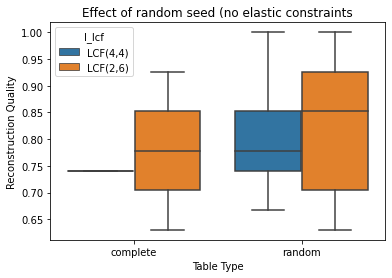

In [9]:
dfRan = dfAll.query('seed != "a" and e_lcf == 1.0')
bp = sns.boxplot(x='t_tab',y='s_matc',hue='l_lcf',data=dfRan)
bp.set(xlabel = 'Table Type', ylabel='Reconstruction Quality',title='Effect of random seed (no elastic constraints')

In the above graph, a *complete* table is one where all possible value combinations are assigned (one per row). There is no randomness in complete tables, so all of the variation in the box plot for the complete table is due to the randomness in the LCF noisy threshold. The box for LCF(4,4) has a hard LCF threshold of 4 (the min and max thresholds are both 4). There is no therefore no randomness in the LCF computation either, and as the graph shows, the different seeds have no effect. In the case of LCF(2,6), however, the is randomness in the LCF computation, and indeed we see substantial variation as a result. The 25/75 quartiles have a difference of almost 10% of the reconstruction quality, and the min and max have a difference of 30%.

A *random* table is one where values for each row are randomly selected from the possible set of values. Here there is randomness in the table itself as well as the LCF noisy threshold. Here the variation in the LCF(4,4) box is due only to the randomness in the table, whereas the variation in the LCF(2,6) box is due to variation in both the LCF computation and the table.

[Text(0.5, 0, 'Mean Error of Aggregate Counts'),
 Text(0, 0.5, 'Reconstruction Quality'),
 Text(0.5, 1.0, 'Effect of random seed')]

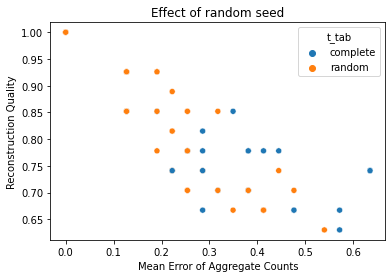

In [12]:
bp = sns.scatterplot(data=dfRan,y='s_matc',x='s_err',hue='t_tab')
bp.set(xlabel = 'Mean Error of Aggregate Counts', ylabel='Reconstruction Quality',title='Effect of random seed')

The above graph shows the average absolute error in the counts of all bucket aggregates versus the row-level reconstruction quality. The correlation is pretty strong, which means that I might try using elastic constraints to push the aggregate counts more towards the middle of the suppression ranges.

Either that or we need to use the average of multiple runs per parameter set to really understand the effect of each parameter set. Note however that from the point of view of the attacker, there is substantial uncertainty in the result of any given attack.

## Effect of seed with elastic constraints

[Text(0.5, 0, 'No-penality fraction'),
 Text(0, 0.5, 'Reconstruction Quality'),
 Text(0.5, 1.0, 'Effect of random seed (with elastic constraints')]

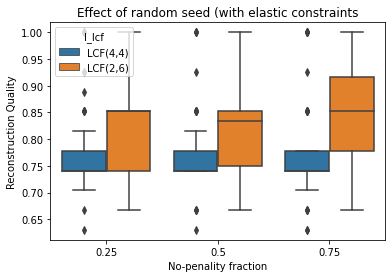

In [10]:
dfRan = dfAll.query('seed != "a" and e_lcf != 1.0')
bp = sns.boxplot(x='e_lcf',y='s_matc',hue='l_lcf',data=dfRan)
bp.set(xlabel = 'No-penality fraction', ylabel='Reconstruction Quality',title='Effect of random seed (with elastic constraints')

## Effect of LCF on reconstruction, no noise

Let's look at the effect of LCF only on reconstruction quality. Here we only look at reconstruction where there is no noise added to counts.

[Text(0.5, 0, 'Low Count Filter Parameters'),
 Text(0, 0.5, 'Reconstruction Fraction\nImprovement over random guess'),
 Text(0.5, 1.0, 'Effect of LCF parameters, no noise')]

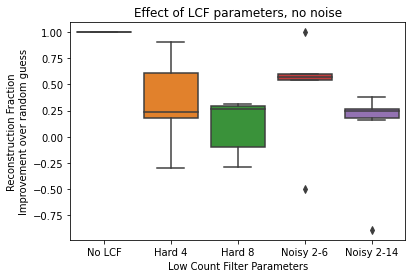

In [6]:
#dfNoNoise = df.query zzzz
df['lcf_label'] = 'none'
df.loc[(df['a_noiA'] == 0) & (df['a_supP'] == 'hard') & (df['a_supT'] == 0), 'lcf_label'] = 'No LCF'
df.loc[(df['a_noiA'] == 0) & (df['a_supP'] == 'hard') & (df['a_supT'] == 4), 'lcf_label'] = 'Hard 4'
df.loc[(df['a_noiA'] == 0) & (df['a_supP'] == 'hard') & (df['a_supT'] == 8), 'lcf_label'] = 'Hard 8'
df.loc[(df['a_noiA'] == 0) & (df['a_supP'] == 'noisy') & (df['a_supT'] == 4), 'lcf_label'] = 'Noisy 2-6'
df.loc[(df['a_noiA'] == 0) & (df['a_supP'] == 'noisy') & (df['a_supT'] == 8), 'lcf_label'] = 'Noisy 2-14'
df1 = df.query('lcf_label != "none"')
bp = sns.boxplot(x=df1["lcf_label"],y=df1["s_impv"])
bp.set(xlabel = 'Low Count Filter Parameters', ylabel='Reconstruction Fraction\nImprovement over random guess',title='Effect of LCF parameters, no noise')

The graph above compares different LCF strategies when there is no noise.

*Hard* means a hard threshold. *Hard 4* means that any user count below 4 is suppressed, and 4 and above is not suppressed. *Noisy* means that the threshold is chosen randomly from a uniform range (i.e. 2 to 6). The y axis is improvement in reconstruction over random guessing. Note that random guessing reconstructs around 50% to 60% of all rows correctly. Values above 0 mean better than random.

No that when there is no LCF (and no noise) reconstruction is perfect. This serves as a validation that the solver is doing the right thing.

As expected, higher LCF thresholds leads to poorer reconstruction. Surprisingly, reconstruction is better with a noisy threshold. I'm not sure why this is. (Though note that a noisy threshold makes other attacks harder, so the fact that the linear reconstruction does better with noisy threshold doesn't mean we should not use one.) 

More surprising, however, is the wide range of reconstruction scores, ranging from worse than random to perfect. I don't know why that is. TODO: Figure this out.

The data used to generate the above graph is shown below.

In [7]:
display(df.query('lcf_label != "none"').sort_values(by=['lcf_label','s_impv']))

,s_matc,s_impv,s_nona,s_rght,s_wrng,a_noiA,a_noiP,a_supP,a_supT,t_shape,t_tab,lcf_label
12,0.568,-0.297297,0.432,0.247,0.321,0,simple,hard,4,"[3, 3, 3, 3]",complete,Hard 4
3,0.684,0.107345,0.316,0.423,0.261,0,simple,hard,4,"[10, 10, 10]",complete,Hard 4
7,0.592,0.200000,0.308,0.113,0.579,0,simple,hard,4,"[10, 10, 10]",random,Hard 4
26,0.741,0.222222,0.259,0.556,0.185,0,simple,hard,4,"[3, 3, 3]",complete,Hard 4
42,0.720,0.255319,0.280,0.448,0.272,0,simple,hard,4,"[5, 5, 5]",complete,Hard 4
49,0.736,0.560000,0.200,0.136,0.664,0,simple,hard,4,"[5, 5, 5]",random,Hard 4
33,0.852,0.765079,0.074,0.333,0.593,0,simple,hard,4,"[3, 3, 3]",random,Hard 4
19,0.951,0.905588,0.049,0.568,0.383,0,simple,hard,4,"[3, 3, 3, 3]",random,Hard 4
34,0.333,-0.285164,0.481,0.074,0.444,0,simple,hard,8,"[3, 3, 3]",random,Hard 8
13,0.568,-0.248555,0.432,0.247,0.321,0,simple,hard,8,"[3, 3, 3, 3]",complete,Hard 8


[Text(0.5, 0, 'Table Generation'),
 Text(0, 0.5, 'Reconstruction Fraction\nImprovement over random guess'),
 Text(0.5, 1.0, 'Effect of table generation, no noise')]

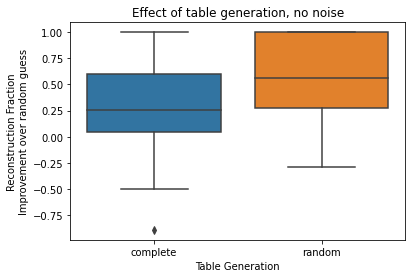

In [8]:
bp = sns.boxplot(x=dfAll["t_tab"],y=df1["s_impv"])
bp.set(xlabel = 'Table Generation', ylabel='Reconstruction Fraction\nImprovement over random guess',title='Effect of table generation, no noise')

The above graph shows that the type of table (random versus complete) has a marked effect on reconstruction quality. A random table is one where values for each row are randomly selected from the possible set of values. A complete table is one where all possible value combinations are assigned (one per row). Reconstruction is better for random tables than for complete tables, though I don't know why. Again the range of reconstruction quality is wide.



[Text(0.5, 0, 'Table shape'),
 Text(0, 0.5, 'Reconstruction Fraction\nImprovement over random guess'),
 Text(0.5, 1.0, 'Effect of table shape')]

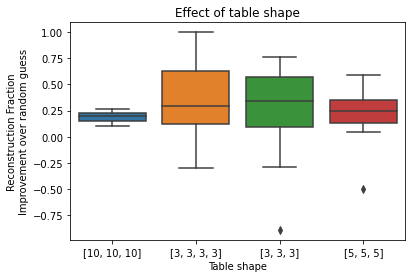

In [9]:
dfTab = df.query('a_supT in (4,8)')
bp = sns.boxplot(x=dfTab["t_shape"],y=dfTab["s_impv"])
bp.set(xlabel = 'Table shape', ylabel='Reconstruction Fraction\nImprovement over random guess',title='Effect of table shape')


The above graph looks at how reconstruction success differs with the "shape" of the table. The notation \[5,5,5\] means that there are three columns each with 5 distinct values. I'm not sure what this graphs tells us (other than that we are not really getting to the bottom of why there is so much variation between experiments).

[Text(0.5, 0, 'Table shape'),
 Text(0, 0.5, 'Solution time (seconds)'),
 Text(0.5, 1.0, 'Effect of table shape on solution time')]

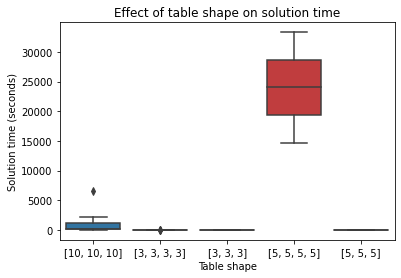

In [10]:
bp = sns.boxplot(x=dfAll["t_shape"],y=dfAll["s_tim"])
bp.set(xlabel = 'Table shape', ylabel='Solution time (seconds)',title='Effect of table shape on solution time')

By the way, here we can see that as the size of the table grows (more columns, more values per column), the length of time to generate a solution grows dramatically. (30K seconds is around 8 hours.)


In [11]:
dfNoLcf = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 0').sort_values(by=['s_susc'])
dfHard4 = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 4').sort_values(by=['s_susc'])
dfHard8 = df.query('a_noiA == 0 and a_supP == "hard" and a_supT == 8').sort_values(by=['s_susc'])
dfNoisy4 = df.query('a_noiA == 0 and a_supP == "noisy" and a_supT == 4').sort_values(by=['s_susc'])
dfNoisy8 = df.query('a_noiA == 0 and a_supP == "noisy" and a_supT == 8').sort_values(by=['s_susc'])
plt.plot(dfNoLcf['s_susc'].tolist(),label='No LCF')
plt.plot(dfHard4['s_susc'].tolist(),label='Hard 4')
plt.plot(dfHard8['s_susc'].tolist(),label='Hard 8')
plt.plot(dfNoisy4['s_susc'].tolist(),label='Noisy 2-6')
plt.plot(dfNoisy8['s_susc'].tolist(),label='Noisy 2-14')
plt.ylabel('Fraction of Privacy Violations')
plt.xlabel('Sorted')
plt.title('Effect of LCF Policies on Privacy')
plt.legend()
plt.show()

KeyError: 's_susc'

Up to now, we've been look at the reconstruction quality. This is simply a measure of how many rows in the reconstructed table match rows in the original table. It is important to note that reconstruction per se does not nescesarily mean that a privacy violation has occured (i.e. singling out or inference). For instance, if two or more users in the original table have the same data, then those users cannot be singled out, and one can argue that privacy is preserved (in a K-anonymity sense). Likewise if multiple users have identical values for N-1 columns, but the Nth column has multiple values among those users, then the Nth column cannot be inferred with 100% condidence. These users' privacy is preserved in a L-diversity sense.

In the above graph, a given row's privacy is violated if the row is singled-out (unique) in both the reconstructed table and the original table. Likewise, a given row's privacy is violated if a value can be inferred in both the reconstructed table and the original table. From the above graph, for any form of LCF, a substantial portion of rows do not have a privacy violation. zzzz we want to know the probability that a singling-out or inference guess is right though...

### Conclusion (LCF)

The main conclusion to draw from all of this is that Linear Reconstruction can work pretty well when the only defense is Low Count Filtering.

## Noise (without LCF)

In the following set of experiments, we look at the effect of simply adding noise to counts.